# K Means Clustering 

|Credentials||
|---|---|
|Name|Ritvik Gupta|
|Registration Number|19BCE0397|
|Assignment|K Means Clustering|


In [55]:
# Importing necessary packages and tools required to perform
# K Means Clustering

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns


<br/>

### Pros and Cons for Statistical Datasets

||Pros|Cons|
|---|---|---|
|1|Relatively simple to implement|Choosing _k_ manually|
|2|Scales to large data sets|Being dependent on initial values|
|3|Guarantees convergence|Clustering data of varying sizes and density|
|4|Can warm-start the positions of centroids|Clustering outliers|
|5|Easily adapts to new examples|Scaling with number of dimensions|

In [56]:
random_state = 768
n_samples = 1500

# Assessment of K Means Clustering for different Hyper-Elliptical Datasets
# with different statistical variations (transformation, variance and cluster sizes)


fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=(
        "",
        "Incorrect Num Clusters",
        "",
        "Anisotropicly distributed",
        "",
        "Different variance",
        "",
        "Unevenly sized blobs",
    ),
)


x1, y1 = make_blobs(n_samples=n_samples, random_state=random_state)
fig.add_trace(go.Scatter(x=x1[:, 0], y=x1[:, 1], mode="markers"), row=1, col=1)

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(x1)
fig.add_trace(
    go.Scatter(
        x=x1[:, 0],
        y=x1[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=1,
    col=2,
)

transformation = [[0.60, -0.65], [-0.40, 0.85]]
x2 = np.dot(x1, transformation)
fig.add_trace(go.Scatter(x=x2[:, 0], y=x2[:, 1], mode="markers"), row=2, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x2)
fig.add_trace(
    go.Scatter(
        x=x2[:, 0],
        y=x2[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=2,
    col=2,
)

x3, _ = make_blobs(
    n_samples=n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5]
)
fig.add_trace(go.Scatter(x=x3[:, 0], y=x3[:, 1], mode="markers"), row=3, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x3)
fig.add_trace(
    go.Scatter(
        x=x3[:, 0],
        y=x3[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=3,
    col=2,
)


x4 = np.vstack((x1[y1 == 0][:500], x1[y1 == 1][:100], x1[y1 == 2][:10]))
fig.add_trace(go.Scatter(x=x4[:, 0], y=x4[:, 1], mode="markers"), row=4, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x4)
fig.add_trace(
    go.Scatter(
        x=x4[:, 0],
        y=x4[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=4,
    col=2,
)


fig.update_layout(height=1600)

fig.show()


/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<br/>

##### K Means generalizes to clusters of different shapes and sizes, such as **elliptical clusters** but is not able to generalize for **non-hyper spherical or elliptical** datasets.


In [57]:
noise = 0.17

# Assessment of K Means for non-hyper ellpitical shapes 
# (moons and hollow circles) with added noise for variation

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Perdicting Moons",
        "Fails to predict for Moons",
        "Perdicting Circles",
        "Correctly predicts for Circles",
    ),
)

x1, _ = make_moons(n_samples=n_samples, random_state=random_state, noise=noise)

fig.add_trace(go.Scatter(x=x1[:, 0], y=x1[:, 1], mode="markers"), row=1, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x1)
fig.add_trace(
    go.Scatter(
        x=x1[:, 0],
        y=x1[:, 1],
        mode="markers",
        marker=dict(color=y_pred),
    ),
    row=1,
    col=2,
)

x2, _ = make_circles(n_samples=n_samples, random_state=random_state, noise=noise)

fig.add_trace(go.Scatter(x=x2[:, 0], y=x2[:, 1], mode="markers"), row=2, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x2)
fig.add_trace(
    go.Scatter(
        x=x2[:, 0],
        y=x2[:, 1],
        mode="markers",
        marker=dict(color=y_pred),
    ),
    row=2,
    col=2,
)

fig.update_layout(height=800)

fig.show()


/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<br/>

### Performing K Means Clustering for Customer Dataset


In [58]:
df = pd.read_csv("./dataset/segmented_customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [59]:
print(df.shape)
df.describe()


(200, 6)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.850000,60.560000,50.200000,2.24500
std,57.879185,13.969007,26.264721,25.823522,1.81423
min,1.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,28.750000,41.500000,34.750000,1.00000
50%,100.500000,36.000000,61.500000,50.000000,2.00000
75%,150.250000,49.000000,78.000000,73.000000,4.00000
max,200.000000,70.000000,137.000000,99.000000,5.00000


<br/>

### Looking at the Variance Distribution and selecting the relevant attributes for K Means

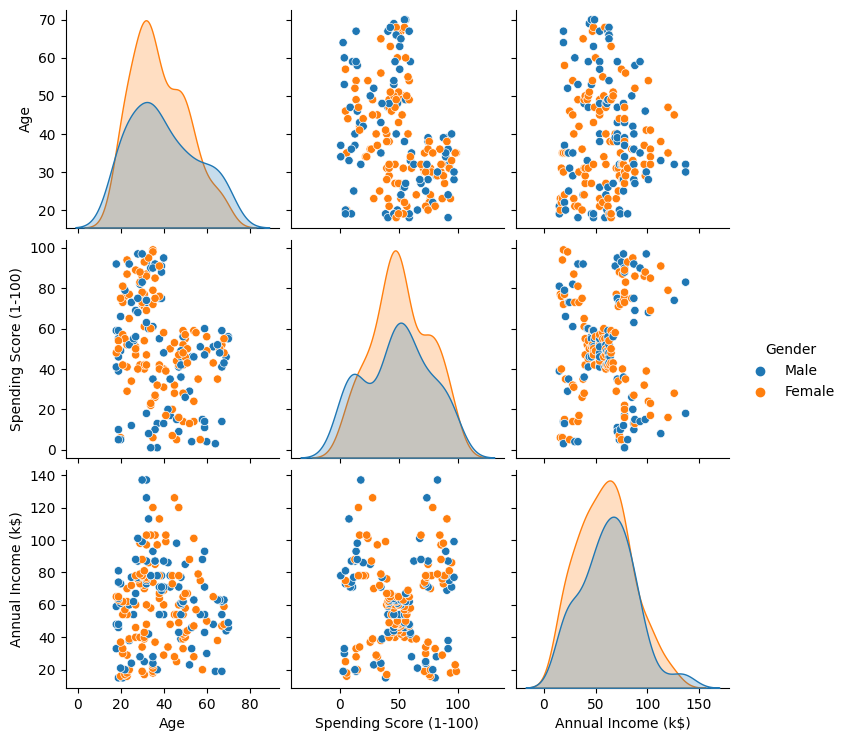

In [60]:
sns.pairplot(
    df, vars=["Age", "Spending Score (1-100)", "Annual Income (k$)"], hue="Gender"
)


In [61]:
px.scatter(
    df,
    x="Age",
    y="Spending Score (1-100)",
    size="Annual Income (k$)",
    color="Annual Income (k$)",
    title="Age v/s Spending Score Visualized based on Annual Income",
    labels={"Age": "Individual's Age", "Spending Score (1-100)": "Spending Score"},
).show()


In [62]:
df[["Age", "Spending Score (1-100)"]]


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [63]:
x1 = df[["Age", "Spending Score (1-100)"]].to_numpy()


In [64]:
# Computing Interia for each system of K Means cluster
# having variable number of clusters used

inertia = []
for n in range(1, 15):
    algorithm = KMeans(
        n_clusters=n,
        init="k-means++",
        n_init=10,
        max_iter=350,
        tol=0.0005,
        random_state=128,
        algorithm="elkan",  # Choosing Elkan for best cluster formation
    )
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

inertia


/Users/ritvikgupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23838.638471653514,
 19623.547976304344,
 15523.68401432875,
 13082.95148962149,
 11554.11611525424,
 10169.500279435446,
 9428.975882730816,
 8719.017913030271,
 8063.191414141414,
 7361.519047619047]

In [65]:
fig = px.line(
    x=np.arange(1, 15),
    y=inertia,
    markers=True,
    text=list(map(int, inertia)),
    labels={"X": "Number of Clusters", "Y": "Interia Generated"},
)

fig.update_traces(textposition="top right")

fig.show()


In [66]:
algorithm = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=10,
    max_iter=350,
    tol=0.0005,
    random_state=128,
    algorithm="elkan",  # Choosing Elkan for best cluster formation
)
algorithm.fit(x1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_


In [67]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1

y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algorithm.predict(np.c_[x_grid.ravel(), y_grid.ravel()])


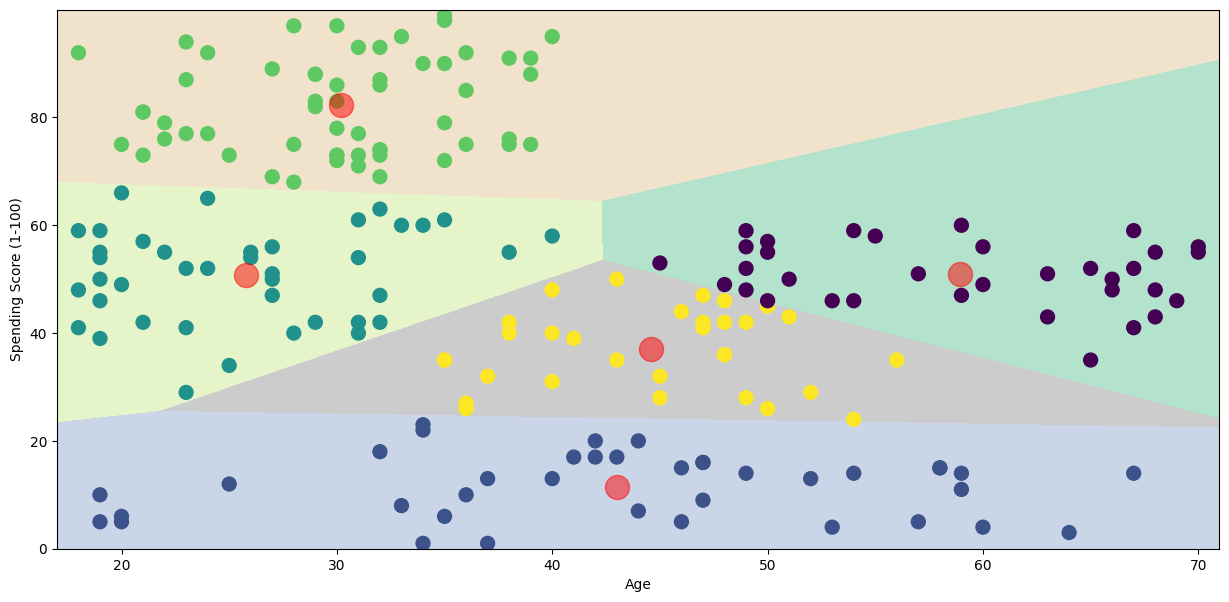

In [68]:
plt.figure(1, figsize=(15, 7))
plt.clf()
z = z.reshape(x_grid.shape)
plt.imshow(
    z,
    interpolation="nearest",
    extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
    cmap=plt.cm.Pastel2,
    aspect="auto",
    origin="lower",
)

plt.scatter(x="Age", y="Spending Score (1-100)", data=df, c=labels, s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c="red", alpha=0.5)
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Age")
plt.show()


In [69]:
x2 = df[["Annual Income (k$)", "Spending Score (1-100)"]].to_numpy()

In [70]:
algorithm = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=10,
    max_iter=350,
    tol=0.0005,
    random_state=128,
    algorithm="elkan",  # Choosing Elkan for best cluster formation
)
algorithm.fit(x2)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_


In [71]:
h = 0.01
x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algorithm.predict(np.c_[x_grid.ravel(), y_grid.ravel()])


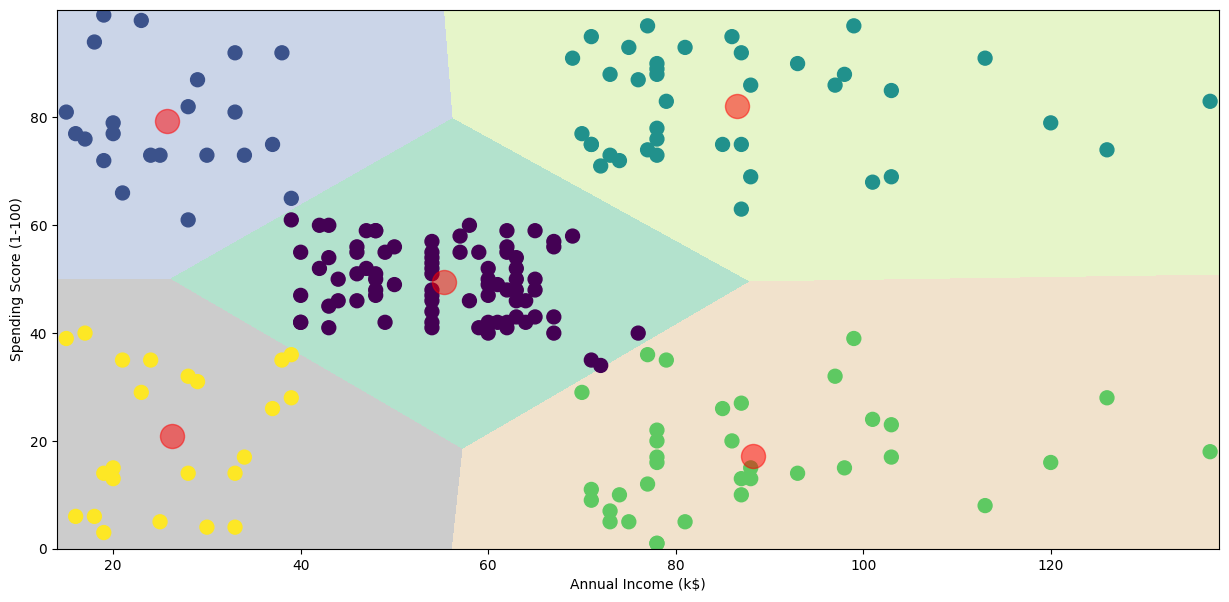

In [72]:
plt.figure(1, figsize=(15, 7))
plt.clf()
z = z.reshape(x_grid.shape)
plt.imshow(
    z,
    interpolation="nearest",
    extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
    cmap=plt.cm.Pastel2,
    aspect="auto",
    origin="lower",
)

plt.scatter(
    x="Annual Income (k$)", y="Spending Score (1-100)", data=df, c=labels, s=100
)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c="red", alpha=0.5)
plt.ylabel("Spending Score (1-100)"), plt.xlabel("Annual Income (k$)")
plt.show()
